Explore the Automobile dataset through visualizations and graphs using matplotlib and seaborn. Learn how to handle null values in the data. Follow the Python code for data preparation and cleaning.

# AUTOMOBILE ANALYSIS

In this project we will see some details of various cars such as MPG(Mileage per Gallons), Cylinders, Displacement, Horsepower, Weight, Acceleration, Model year, Origin; I did some analysis of the cars data that shows some comparisons and performance of cars. In this EDA, I will explore the automobile dataset through visualizations and graphs using common libraries such as pandas, matplotlib and seaborn.

## Downloading the Dataset

Let's begin by downloading the data, and listing the files within the dataset.

In [5]:
!pip install numpy pandas matplotlib seaborn plotly --quiet
!pip install scipy opendatasets graphviz lightgbm scikit-learn --upgrade --quiet

## Data Preparation and Cleaning


Loading the dataset into a data frame using the standard read_csv command from Pandas

In [6]:
import opendatasets as od
import pandas as pd
import numpy as np

In [7]:
file_path= 'D:/Automobile.csv'
automobile_df = pd.read_csv(file_path)

From above output we can see a glimpse of our data we want to work with

In [8]:
automobile_df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


From above output we can see a glimpse of our data we want to work with

In [11]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


There are 398 entries and 9 columns to work with. Also, there are a few columns that contain null values we can check that also

In [12]:
automobile_df.nunique()

name            305
mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
dtype: int64

we can also check if there are null values or not and also how many null values are there in it

In [13]:
automobile_df.isnull().any()

name            False
mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

here we can see that 1 column has null value which shows true. Now we can see how many values are null.

In [14]:
automobile_df.isnull().sum().sum()

6

In [15]:
#we can also fill the null values of the column
automobile_df['horsepower'].fillna(0)
automobile_df.isnull().any()

name            False
mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

## Exploratory Analysis and Visualization


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

getting the statistical information about the data frame automobile_df

In [17]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [18]:
#this will show the sum of all the cylinders
automobile_df.cylinders.sum()

2171

Now creating distribution of some columns using histogram

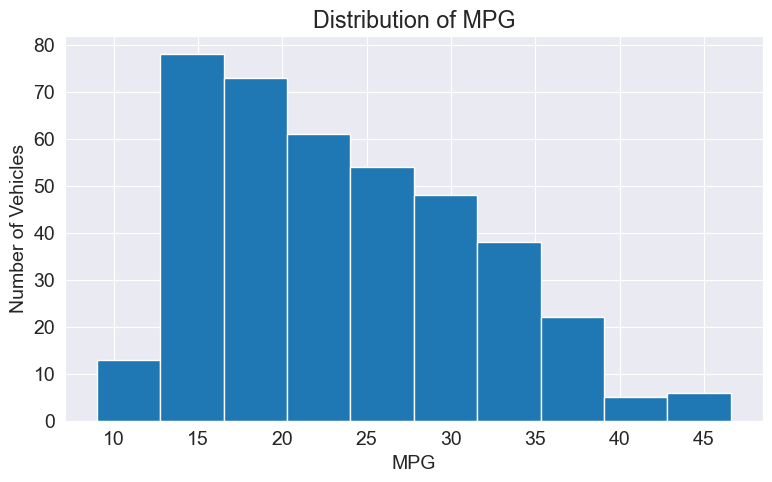

In [19]:
plt.title("Distribution of MPG") 
#adds title to the graph
plt.xlabel("MPG")
plt.ylabel("Number of Vehicles")
plt.hist(automobile_df.mpg);

We can see the no. of vehicles giving particular MPG, also we can see the minimum and maximum values

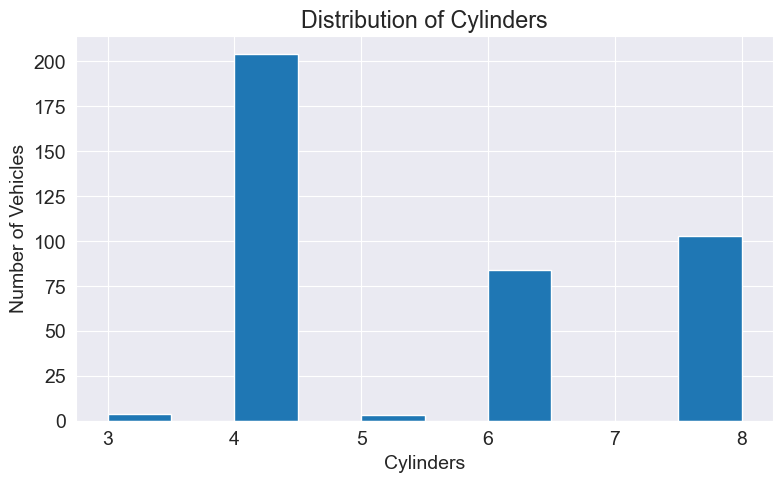

In [20]:
plt.title("Distribution of Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Number of Vehicles")
plt.hist(automobile_df.cylinders);

The above plot shows the no of vehicles having no of cylinders, as we can see that most vehicles are having 4 cylinders

Now plotting the graph between the two numeric rows of data frame

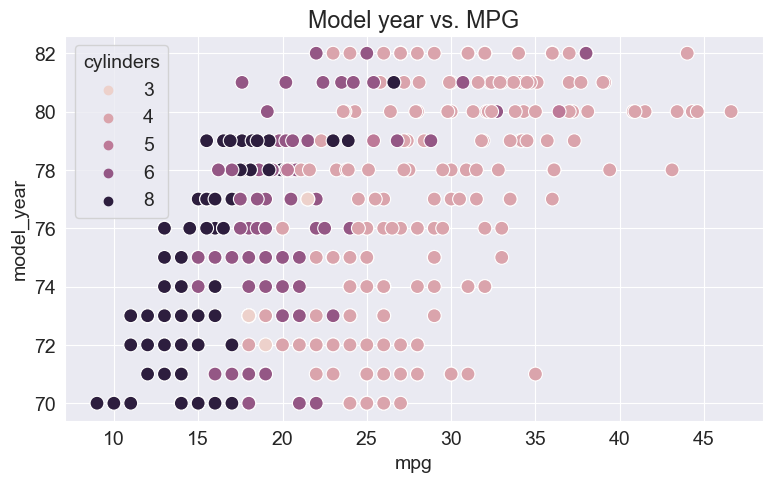

In [21]:
plt.title('Model year vs. MPG')
sns.scatterplot(x="mpg", y="model_year",hue= "cylinders", s=100, data= automobile_df);

From above graph we can clearly see that the vehicles having more cylinders would have less MPG, with every year the mpg of the vehicles increases
Also we have seen that the manufacturing of vehicles are also increased during the years as there are clusters formed in years after 75

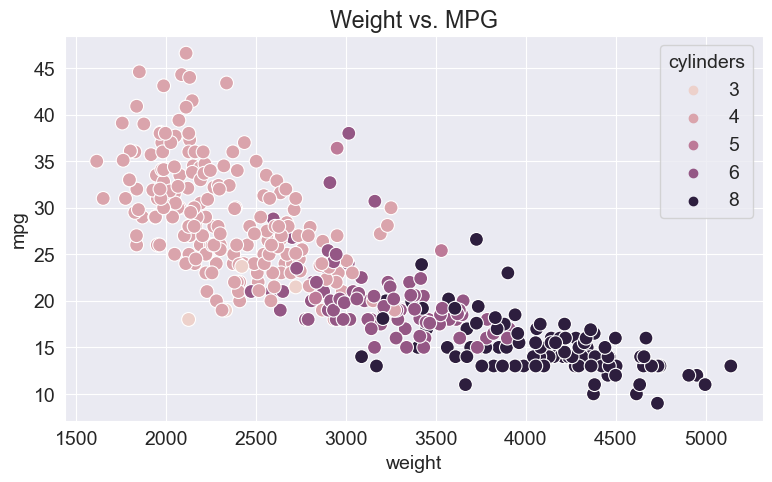

In [22]:
plt.title('Weight vs. MPG')
sns.scatterplot(x="weight", y="mpg",hue= 'cylinders', s=100, data= automobile_df);

From above graph we can see that with increasing weights the MPG decreases and also with increasing cylinders the weight increases as shown by the color hue.

Now we can also do some analysis by the hely of some graphical representation, as it saves time because only by seeing the graphs we can analyze the approximate values 

In [23]:
automobile_df.cylinders.value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

Here we can see the no of vehicles having how much cylinders i.e. 204 vehicles are  4 cylinder vehicles, etc. shown in above list.

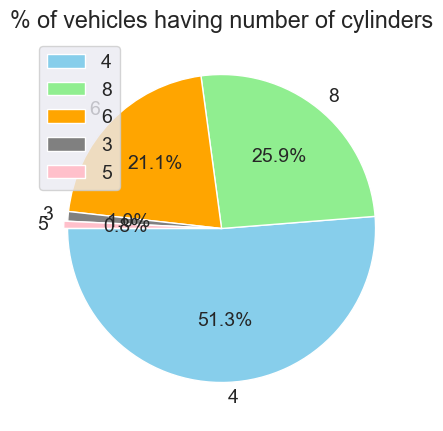

In [24]:
plt.title("% of vehicles having number of cylinders")
plt.pie(automobile_df.cylinders.value_counts(), explode=(0, 0, 0, 0, 0.025), labels=automobile_df.cylinders.value_counts().index, colors=['skyblue','lightgreen','orange','grey','pink'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

The above pie chart shows the overall percentage vehicle having number of cylinders. This will show the what percentage of vehicles having how many cylinders

In [25]:
automobile_df.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

This is showing the number of vehicles manufactured in respective countries.

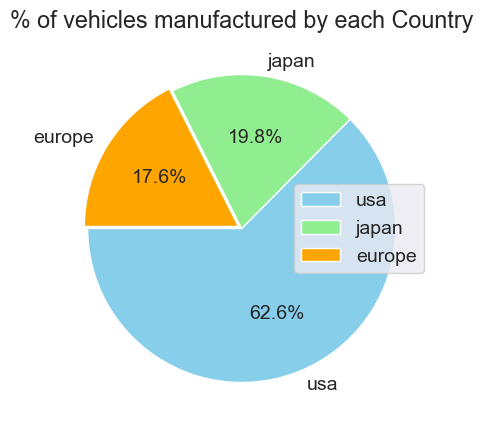

In [26]:
plt.title("% of vehicles manufactured by each Country")
plt.pie(automobile_df.origin.value_counts(), explode=(0, 0, 0.025), labels=automobile_df.origin.value_counts().index, colors=['skyblue','lightgreen','orange'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

The above pie chart shows the vehicles manufactured by each of the three Countries.

Plot a graph to see the vehicles and it's origin

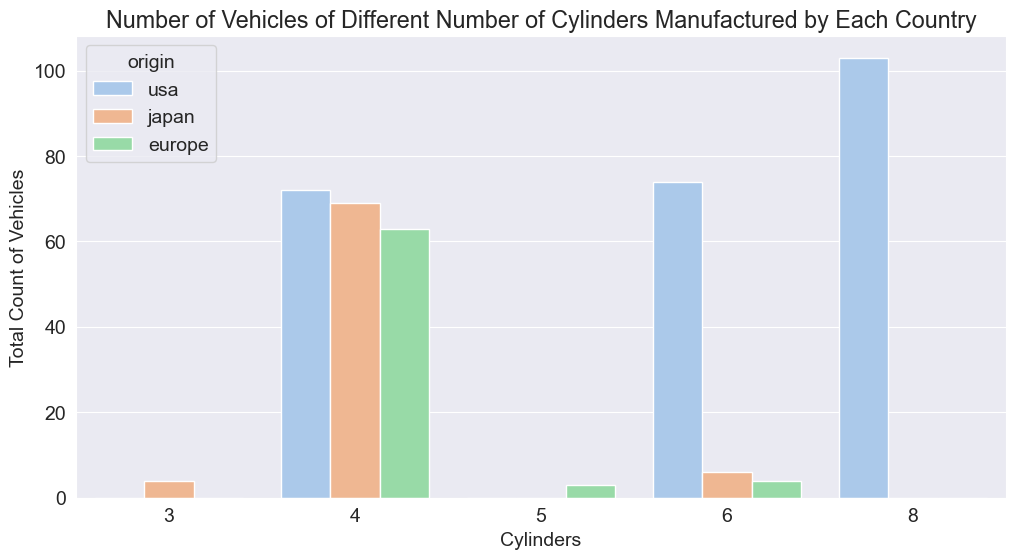

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
g = sns.countplot(data=automobile_df, x='cylinders', hue='origin', palette='pastel')
plt.title("Number of Vehicles of Different Number of Cylinders Manufactured by Each Country")
plt.xlabel("Cylinders")
plt.ylabel("Total Count of Vehicles")
plt.show()

The above graph shows the total number of vehicles manufactured by the country in order of the cylinders, like we can observe that 4 cylinder vehicles are manufactured in all the 3 countries and 8 cylinder vehicles are manufactured only in USA.

## Questions and Answers

here are some analysis of data and questions and answers

#### Q1: WHICH VEHICLE HAS THE MAXIMUM ACCELERATION  ?

First we have to calculate the maximum value of acceleration and  then we can get the corresponding name of the vehicle

In [31]:
max_index=automobile_df['acceleration'].idxmax() 
#we are getting the index of the highest value of acceleration column

max_acc=automobile_df.loc[max_index,'acceleration'] 
#here we get the maximum acceleration value 

vehicle_max_acc= automobile_df.loc[max_index,'name'] 
#now to that index we get the name from name column

print('Highest acceleration is : ',max_acc) 
#printing the maximum acceleration

print(vehicle_max_acc, ' has the highest acceleration') 
#printing the name of vehicle having maximum acceleration

Highest acceleration is :  24.8
peugeot 504  has the highest acceleration


In output we get the maximum value of acceleration and also vehicle maximum acceleration. Also we can see the highest peak in graph i.e. maximum acceleration.

#### Q2: What is the relationship between MPG and displacement?

we can see the relationship between MPG and displacement by plotting a graph as shown below

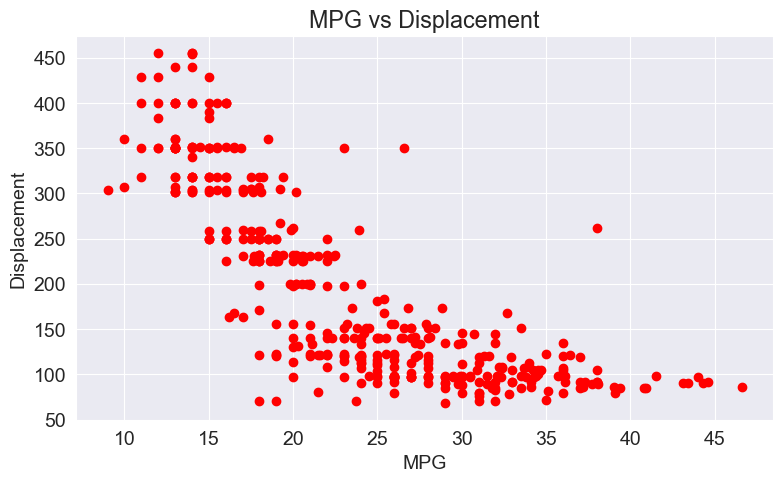

In [32]:
plt.plot(automobile_df.mpg, automobile_df.displacement, 'or') 
#We are plotting graph between MPG and displacement to see the variations

plt.title('MPG vs Displacement')
plt.xlabel('MPG')
plt.ylabel('Displacement');

The higher the displacement, the more fuel it takes . That means that as high as the displacement the engines use more fuel, and therefore have less efficiency. but also vehicles having displacement 100-200 have so many variations in MPG.

#### Q3: What is the relationship between a car's weight and MPG?

we can see the relationship between weight and MPG by plotting a graph as shown below

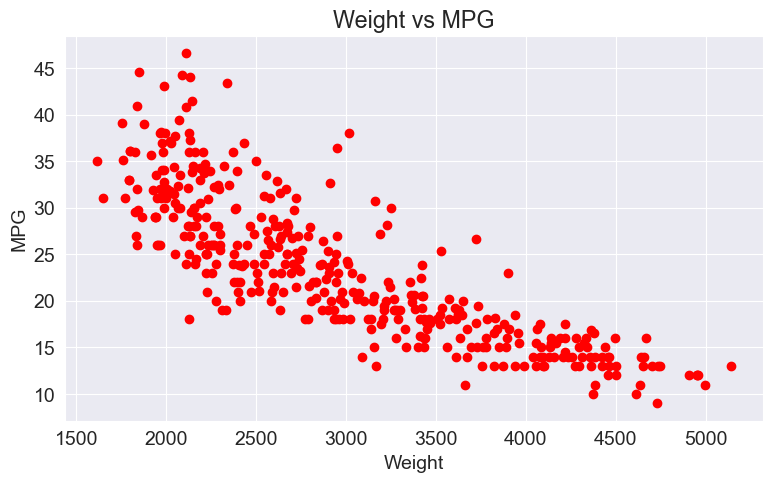

In [34]:
plt.plot(automobile_df.weight, automobile_df.mpg, 'or') 
#We are plotting graph between weight and MPG to see the variations

plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG');

From the above plot we can see that the heavier the vehicle more power it needs to accelerate thus affecting the miles per gallon of the car. As we can see, increase in the weight of the car decrease the miles per gallon of the car, hence the correlation between these two variables is negative.

#### Q4: CREATE THE DATAFRAME FROM HORSEPOWER HAVING MAXIMUM NUMBER OF CARS HAVING HOW MUCH HORSEPOWER ?

Here we will use the horsepower column to create a dataframe shows the count of vehicles having that horsepower.

In [35]:
top_horsepower= automobile_df.horsepower.value_counts().head(15)
top_horsepower.to_frame()

,count
horsepower,
150.0,22
90.0,20
88.0,19
110.0,18
100.0,17
75.0,14
95.0,14
105.0,12
70.0,12


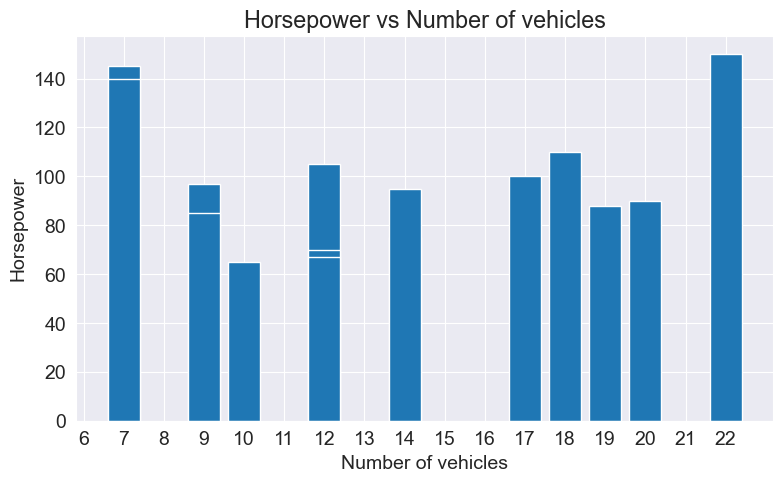

In [36]:
plt.bar(top_horsepower,top_horsepower.index)
plt.xticks(range(6, 23))
plt.title("Horsepower vs Number of vehicles")
plt.xlabel("Number of vehicles") 
plt.ylabel("Horsepower");

the above sub dataframe shows the number of vehicles have how much horse power in descending order. i.e. 22 vehicles have 150 horsepower, 20 vehicles have 90 horsepower, 19 vehicles have 88 horsepower, etc. And graph shows the plot of the sub dataframe.

#### Q5: HOW TO AGGREGATE MEAN, MINIMUM AND MAXIMUM OF VEHICLES BASED ON CYLINDERS FOR MPG COLUMN?

creating a dataframe using column cylinders, one can show the mean, minimum and maximum values of other column as shown below

In [37]:
aggregate=automobile_df.groupby('cylinders').agg({'mpg':['mean','min','max']})
aggregate

mpg            
                mean   min   max
cylinders                       
3          20.550000  18.0  23.7
4          29.286765  18.0  46.6
5          27.366667  20.3  36.4
6          19.985714  15.0  38.0
8          14.963107   9.0  26.6

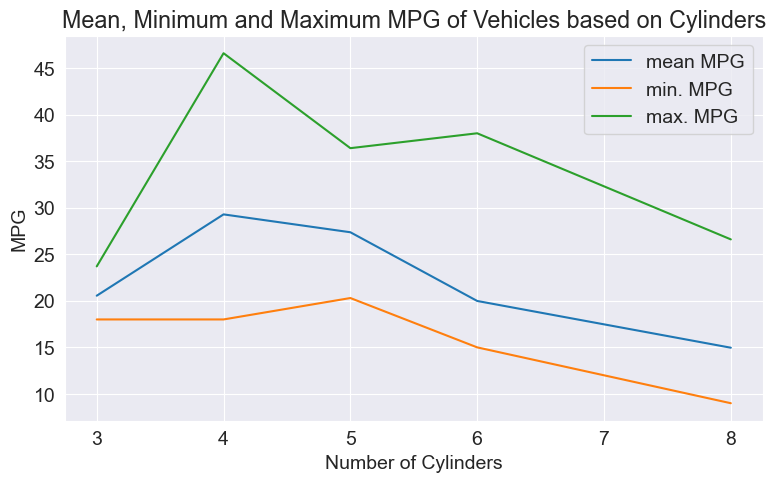

In [38]:
aggregate.plot();
plt.title('Mean, Minimum and Maximum MPG of Vehicles based on Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.legend(['mean MPG', 'min. MPG', 'max. MPG']);

here we can see that 4 cylinder vehicles have the highest MPG, also other info about other vehicles.

## Inferences and Conclusion

In this project we have got some important conclusions

- compared MPG with displacement and weights that shows higher the displacement MPG decreases and the heavier the vehicle more power it needs to accelerate thus affecting the MPG of the car.
- some graphs that shows variations like the manufacturing of vehicles of each cylinders in each country that shows USA manufactured maximum Vehicles i.e. 62.6%.
- graphs that shows the variations with respect to the other parameter like weight and mpg that shows, manufacturing year(MODEL YEAR) and MPG that shows with increasing weight the MPG decreases, and by increasing cylinders the weight increases'
- pie that clearly shows the contributions like the countries manufacturing what percentage of total vehicles on record (USA:62.6% , JAPAN:19.8% ,EUROPE:17.6%) 
- and some questions and answers with plots and visualizations.

## References and Future Work

REFERENCES:

- https://rpubs.com/tlewando/data101_mpgproject#:~:text=MPG%20and%20Engine%20Displacement,-A%20scatterplot%20that&text=The%20trend%20shown%20in%20this,and%20therefore%20are%20less%20efficient.
- https://homework.study.com/explanation/suppose-you-are-determining-the-association-between-the-weight-of-a-car-and-the-miles-per-gallon-that-the-car-gets-a-define-correlation-and-talk-about-how-you-can-use-correlation-to-determine-the-r.html#:~:text=The%20heavier%20the%20vehicle%20more,these%20two%20variables%20is%20negative.
- https://jovian.com/abubakkarsid415/analysis-on-videogames-sales-data-abubakkar
- https://jovian.com/allenkong221/netflix-movies-and-tv-shows-project
- https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/?expand_article=1
    
    
    
FUTURE WORK:
- We can also add some more informations and can implement more formulas.
- Also we can add more columns like mileage per litres as it varies with countries.
- If we would have some more information we can also calculate more data like torque etc.
- More operations can be done after adding more informations.
- Implementing Machine Learning models.
- Prediction of the number of users by using the regression model.

<center><font size="+2"><i>THANKYOU</i></font></center>